In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

In [2]:
olist_customers_dataset           = './dataset/archive/olist_customers_dataset.csv' 
olist_geolocation_dataset         = './dataset/archive/olist_geolocation_dataset.csv'
olist_order_items_dataset         = './dataset/archive/olist_order_items_dataset.csv' 
olist_order_payments_dataset      = './dataset/archive/olist_order_payments_dataset.csv' 
olist_order_reviews_dataset       = './dataset/archive/olist_order_reviews_dataset.csv' 
olist_orders_dataset              = './dataset/archive/olist_orders_dataset.csv' 
olist_products_dataset            = './dataset/archive/olist_products_dataset.csv' 
olist_sellers_dataset             = './dataset/archive/olist_sellers_dataset.csv'
product_category_name_translation = './dataset/archive/product_category_name_translation.csv'

In [50]:
orders_dataset         = pd.read_csv(olist_orders_dataset, sep=",")[['order_id', 'customer_id','order_purchase_timestamp']]
customers_dataset      = pd.read_csv(olist_customers_dataset, sep=",")[['customer_id','customer_city','customer_state']]
order_items_dataset    = pd.read_csv(olist_order_items_dataset, sep=",")[['order_id', 'product_id']]
products_dataset       = pd.read_csv(olist_products_dataset, sep=",")[['product_id', 'product_category_name']]
product_category_name  = pd.read_csv(product_category_name_translation, sep=",")[['product_category_name', 'product_category_name_english']]
order_payments_dataset = pd.read_csv(olist_order_payments_dataset, sep=",")

In [49]:
customers_dataset.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [37]:
merged_product_1            = pd.merge(products_dataset, product_category_name, on='product_category_name')
merge_order_items_dataset_1 = pd.merge(order_items_dataset, merged_product_1, on='product_id')
merge_2                     = pd.merge(orders_dataset, merge_order_items_dataset_1, on='order_id')
merge_3                     = pd.merge(merge_2, order_payments_dataset, on='order_id')
merge_data                  = pd.merge(merge_3, customers_dataset, on='customer_id')

In [95]:
merge_data.head(20)

,order_id,customer_id,order_purchase_timestamp,product_id,product_category_name,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,1,credit_card,1,18.12,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,3,voucher,1,2.00,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,2,voucher,1,18.59,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,perfumaria,perfumery,1,boleto,1,141.46,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,automotivo,auto,1,credit_card,3,179.12,vianopolis,GO
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,pet_shop,1,credit_card,1,72.20,sao goncalo do amarante,RN
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,stationery,1,credit_card,1,28.62,santo andre,SP
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,2017-07-09 21:57:05,060cb19345d90064d1015407193c233d,automotivo,auto,1,credit_card,6,175.26,congonhinhas,PR
8,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,2017-05-16 13:10:30,4520766ec412348b8d4caa5e8a18c464,automotivo,auto,1,credit_card,3,75.16,nilopolis,RJ
9,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,2017-01-23 18:29:09,ac1789e492dcd698c5c10b97a671243a,moveis_decoracao,furniture_decor,1,boleto,1,35.95,faxinalzinho,RS


In [76]:
df_attribute = merge_data[['order_id','customer_id','order_purchase_timestamp', 'product_category_name_english', 'payment_type','payment_sequential','payment_installments','payment_value','customer_city','customer_state']]

In [77]:
df_attribute['month'] = pd.to_datetime(df_attribute['order_purchase_timestamp']).dt.strftime('%m')
df_attribute['year'] = pd.to_datetime(df_attribute['order_purchase_timestamp']).dt.strftime('%Y')

/var/folders/cd/zv8800b145196b4_9d1_rvsr0000gp/T/ipykernel_5657/566013907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attribute['month'] = pd.to_datetime(df_attribute['order_purchase_timestamp']).dt.strftime('%m')


In [78]:
df_attribute = df_attribute.drop('order_purchase_timestamp', axis=1)

In [79]:
df_attribute.isnull().any()

order_id                         False
customer_id                      False
product_category_name_english    False
payment_type                     False
payment_sequential               False
payment_installments             False
payment_value                    False
customer_city                    False
customer_state                   False
month                            False
year                             False
dtype: bool

In [94]:
def label_encoder(data):
    le = LabelEncoder()
    for column in data.columns:
        if data[column].dtype == object:
            data[column] = le.fit_transform(data[column])
    return data

def one_hot_label(data_set, column_name: list):
    for col in column_name:
        data_set = data_set.join(pd.get_dummies(data_set[col], prefix=col, dtype=int))
    return data_set

def k_mean_func(n_clusters, data):
    kmeans = KMeans(n_clusters, init='k-means++', max_iter=400, n_init=20, random_state=0)
    return kmeans.fit(data)

In [86]:
pre_data = label_encoder(df_attribute)
tr_data = pd.DataFrame(pre_data, columns=pre_data.columns[2:])

In [93]:
tr_data.head(10)

,product_category_name_english,payment_type,payment_sequential,payment_installments,payment_value,customer_city,customer_state,month,year
0,49,1,1,1,18.12,3576,25,9,1
1,49,3,3,1,2.00,3576,25,9,1
2,49,3,2,1,18.59,3576,25,9,1
3,59,0,1,1,141.46,416,4,6,2
4,5,1,1,3,179.12,4027,8,7,2
5,60,1,1,1,72.20,3453,19,10,1
6,66,1,1,1,28.62,3356,25,1,2
7,5,1,1,6,175.26,1028,17,6,1
8,5,1,1,3,75.16,2444,18,4,1
9,39,0,1,1,35.95,1315,22,0,1


In [88]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tr_data)
scaled_df = pd.DataFrame(scaled_data, columns=tr_data.columns)

In [89]:
tr_data.columns

Index(['product_category_name_english', 'payment_type', 'payment_sequential',
       'payment_installments', 'payment_value', 'customer_city',
       'customer_state', 'month', 'year'],
      dtype='object')

In [90]:
scaled_df.head(10)

,product_category_name_english,payment_type,payment_sequential,payment_installments,payment_value,customer_city,customer_state,month,year
0,0.448089,0.114743,-0.127987,-0.699855,-0.577736,1.004133,0.893773,1.230778,-1.068983
1,0.448089,3.216243,2.629456,-0.699855,-0.637860,1.004133,0.893773,1.230778,-1.068983
2,0.448089,3.216243,1.250734,-0.699855,-0.575983,1.004133,0.893773,1.230778,-1.068983
3,0.892247,-1.436008,-0.127987,-0.699855,-0.117700,-1.623592,-2.077776,0.300016,0.911220
4,-1.506203,0.114743,-0.127987,0.019579,0.022764,1.379166,-1.511766,0.610270,0.911220
5,0.936662,0.114743,-0.127987,-0.699855,-0.376027,0.901851,0.044759,1.541032,-1.068983
6,1.203157,0.114743,-0.127987,-0.699855,-0.538573,0.821190,0.893773,-1.251255,0.911220
7,-1.506203,0.114743,-0.127987,1.098728,0.008367,-1.114679,-0.238245,0.300016,-1.068983
8,-1.506203,0.114743,-0.127987,0.019579,-0.364987,0.062809,-0.096743,-0.320493,-1.068983
9,0.003932,-1.436008,-0.127987,-0.699855,-0.511233,-0.876021,0.469266,-1.561509,-1.068983


In [15]:
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(scaled_df)
df_reduced.shape

(115878, 6)

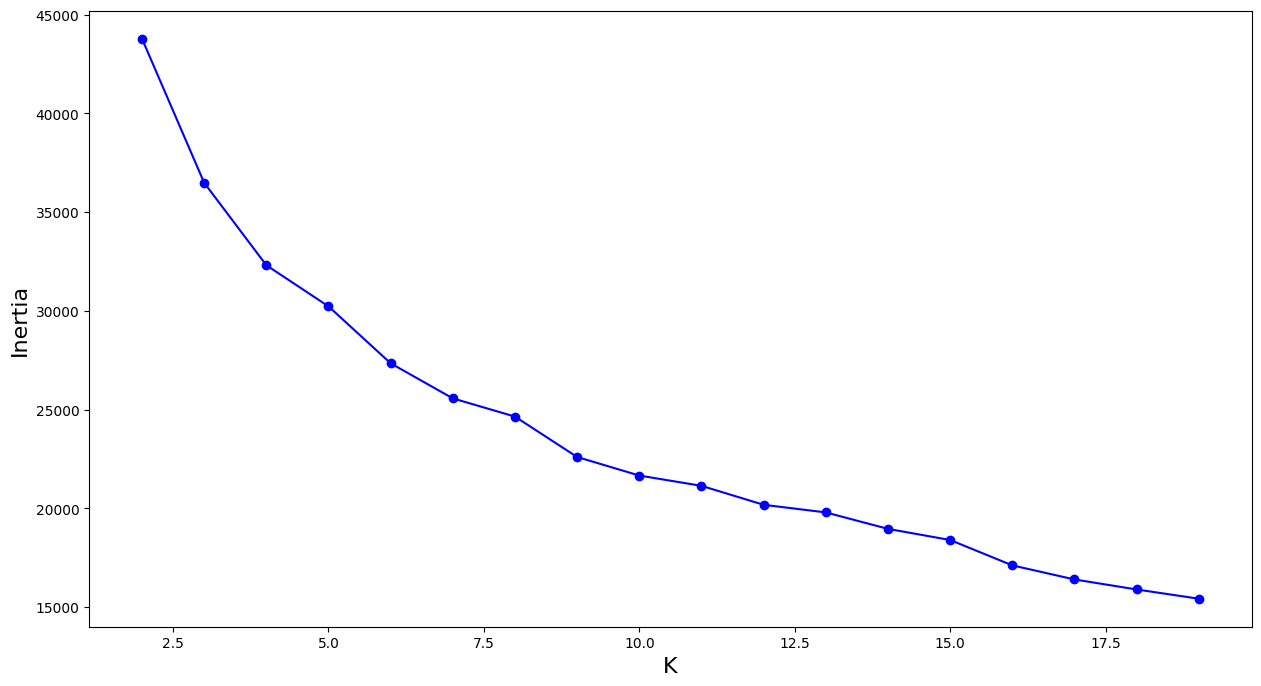

In [16]:
k_range = range(2, 20)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_reduced)
                for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(15, 8))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('K', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.show()

In [17]:
silhouette_scores = [silhouette_score(df_reduced, model.labels_)
                      for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]
# Best number of clusters
best_k
plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

KeyboardInterrupt: 